<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/LSTM20210630_present_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phần 1: ví dụ mẫu

In [1]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras import backend as KK
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=5, verbose=0)
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[3.846682  4.4973364]]


In [2]:
### plot ket qua
y_ORG=list(y.flatten().reshape(y.shape[0],y.shape[1])[:,0])
for i in range(1,y.shape[1]):
  # y_ORG=np.concatenate((y_ORG,y.flatten().reshape(y.shape[0],y.shape[1])[:,i]))
  y_ORG.append(y.flatten().reshape(y.shape[0],y.shape[1])[:,i][-1])
y_ORG

[65, 85, 105, 125, 145, 165, 185]

# Phần 2 : áp dụng cho correlation 1

In [3]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# # define input sequence
# in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
# in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
# out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# # convert to [rows, columns] structure
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns


In [4]:
# read data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import os
os.chdir('/content/drive/MyDrive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# tao thu muc chua anh xuat ra
out_dir_all=['output_fig_210630','output_tab_210630']
for out in out_dir_all:
  if not os.path.exists(out):
    os.makedirs(out)


In [ ]:


# df0=pd.read_csv('input_data/percentile_season_adj.csv')
# df0.head()
dataset1000=pd.read_csv("input_data/percentile_season_adj.csv")
# dataset0.describe()
# dataset00.head()
# # chuyen data tu 2001/01-2019/12
# dataset0=dataset00.iloc[6:-4,0:]
# dataset0.reset_index(drop=True,inplace=True)
# dataset0
# =============================================================================
# Arrange predicted column
list1 = dataset1000.columns.tolist()
# for k in range(1,len(list1)):
    #  check station 1
k=1  
list2=list1[0:1]+list1[k:]+list1[1:k]
# print(list2)
# Using indent to control loop of station
# dataset=dataset0[list2]
# dataset.describe()
# modified dataset
# print(list2)
# Using indent to control loop of station
# dataset100=dataset0[list2]
# dataset.describe()
dataset0=dataset1000[list2] # avoid dataset0 not change
corr = dataset0.corr()
df=corr
df2 = df[df.columns[df.iloc[0,:] > 0.9]]
df2
list3=df2.columns.tolist()
list3.insert(0,'Date')
dataset=dataset0[list3]
dataset0=dataset # avoid dataset0 not change
fig0=plt.Figure()
plt.Figure(figsize=(8,6))
corr1 = dataset.corr()
# corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
# plt.title("Zones have correlation > 0.9 at  "+list1[k])
# plt.tight_layout()
# plt.savefig(output_fig+"\\"+list1[k]+"Corel"+".png",dpi=300)
fig, ax = plt.subplots()
sns.heatmap(dataset.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
# ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.title("Zones have correlation > 0.9 at  "+list1[k])
# plt.savefig(output_fig+"/"+list1[k]+"Corel"+".png",dpi=300, bbox_inches='tight', pad_inches=0.0)

# corr1.to_csv(output_table+"/"+list1[k]+"cor"+".csv")
dataset.to_csv('/content/drive/MyDrive/input_data/correl_in_Andong.csv')
dataset.head()

In [6]:
# Don gian lay 3 tram thoi

df0=dataset
# import numpy as np

# in_seq1=df0.iloc[:,2].values
# in_seq2=df0.iloc[:,3].values
# out_seq=df0.iloc[:,1].values
# # define input sequence
# # in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
# # in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
# # out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# # convert to [rows, columns] structure
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# # horizontally stack columns
# dataset = hstack((in_seq1, in_seq2, out_seq))
dataset=df0.iloc[:,1:].values
# split data into train and test
dataset_train=dataset[0:31*12,:]
dataset_val=dataset[29*12:32*12,:]
dataset_test=dataset[33*12:,:]
# # choose a number of time steps
# n_steps_in, n_steps_out = 24,3
# # covert into input/output
# Xtrain, ytrain = split_sequences(dataset_train, n_steps_in, n_steps_out)
# Xval, yval = split_sequences(dataset_val, n_steps_in, n_steps_out)
# Xtest, ytest = split_sequences(dataset_test, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2



# Phần 3: Hiệu chỉnh thông số

* chọn scale data
* chọn learning rate
* chọn activate function
* Thêm các lớp

In [7]:
# scale data về 0, 1 trước khi chia dữ liệu

#https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# # create scaler
# scaler = MinMaxScaler([0,1])
# # scaler = StandardScaler()
# # fit and transform in one step
# normalized = scaler.fit_transform(dataset)
# # inverse transform
# inverse = scaler.inverse_transform(normalized)

# # 
# # split data into train and test
# dataset=normalized
# dataset_train=dataset[0:31*12,:]
# dataset_val=dataset[29*12:32*12,:]
# dataset_test=dataset[33*12:,:]
# # choose a number of time steps
# n_steps_in, n_steps_out = 24,12
# # covert into input/output
# Xtrain, ytrain = split_sequences(dataset_train, n_steps_in, n_steps_out)
# Xval, yval = split_sequences(dataset_val, n_steps_in, n_steps_out)
# Xtest, ytest = split_sequences(dataset_test, n_steps_in, n_steps_out)
# # the dataset knows the number of features, e.g. 2
# # scaled data mô hình không hiệu quả?


In [8]:
# scale theo vi du cua tensorflow
train_mean = dataset_train.mean()
train_std = dataset_train.std()

val_mean = dataset_val.mean()
val_std = dataset_val.std()
####################################################
test_mean = dataset_test.mean()
test_std = dataset_test.std()
# cai goc la scale theo train thoi
train_df = (dataset_train - train_mean) / train_std
val_df = (dataset_val - train_mean) / train_std
test_df = (dataset_test - train_mean) / train_std
#####################################################

# # minh sua lai scale tung cai
# train_df = (dataset_train - train_mean) / train_std
# val_df = (dataset_val - val_mean) / val_std
# test_df = (dataset_test - test_mean) / test_std
# scale tung cai rieng
####################################################

# # scale theo maxmin về 1,0 để dễ sử dụng các acctivation
# # scale theo vi du cua tensorflow
# train_max = dataset_train.max()
# train_min = dataset_train.min()

# val_mean = dataset_val.mean()
# val_std = dataset_val.std()

# test_mean = dataset_test.mean()
# test_std = dataset_test.std()
###############################################################
# # cai goc la scale theo train thoi
# train_df = (dataset_train - train_min) / (train_max-train_min)
# val_df = (dataset_val - train_min) / (train_max-train_min)
# test_df = (dataset_test - train_min) / (train_max-train_min)
##############################################################
# # Khong scale gì hết bà nội mày
# train_df=dataset_train
# val_df=dataset_val
# test_df=dataset_test
# ##############################################################

# 
# choose a number of time steps
n_steps_in, n_steps_out = 12,6
# covert into input/output
Xtrain, ytrain = split_sequences(train_df, n_steps_in, n_steps_out)
Xval, yval = split_sequences(val_df, n_steps_in, n_steps_out)
Xtest, ytest = split_sequences(test_df, n_steps_in, n_steps_out)

#
import tensorflow as tf
patience0=50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience0,
                                                    mode='min')
learing_rate0=0.01
beta_1_0=0.9
beta_2_0=0.999
epsilon_0=1e-07


In [9]:

n_features = Xtrain.shape[2]
# define model
KK.clear_session()
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learing_rate0, 
                                             beta_1=beta_1_0, 
                                             beta_2=beta_2_0,
                                             epsilon=epsilon_0, 
                                             amsgrad=True),
              
              loss='mse')
# fit model
history=model.fit(Xtrain, ytrain,epochs=106, verbose=1,validation_data=(Xval,yval),
                  batch_size=32,
                  callbacks=[early_stopping])


Epoch 1/106
12/12 [==============================] - 6s 176ms/step - loss: 1.0654 - val_loss: 1.0670
Epoch 2/106
12/12 [==============================] - 1s 65ms/step - loss: 1.1199 - val_loss: 1.0414
Epoch 3/106
12/12 [==============================] - 1s 64ms/step - loss: 1.0255 - val_loss: 1.0494
Epoch 4/106
12/12 [==============================] - 1s 62ms/step - loss: 1.0435 - val_loss: 1.0536
Epoch 5/106
12/12 [==============================] - 1s 62ms/step - loss: 0.9969 - val_loss: 0.9185
Epoch 6/106
12/12 [==============================] - 1s 64ms/step - loss: 0.8631 - val_loss: 0.8605
Epoch 7/106
12/12 [==============================] - 1s 63ms/step - loss: 0.8883 - val_loss: 0.8769
Epoch 8/106
12/12 [==============================] - 1s 66ms/step - loss: 0.8440 - val_loss: 0.8607
Epoch 9/106
12/12 [==============================] - 1s 62ms/step - loss: 0.8726 - val_loss: 0.8832
Epoch 10/106
12/12 [==============================] - 1s 62ms/step - loss: 0.8827 - val_loss: 0.849

In [10]:

# demonstrate prediction
x_input = Xtest
x_input = x_input.reshape((Xtest.shape[0], n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[-0.06868407  0.0430073   0.28770784  0.928618    0.28830683  0.04953317]
 [ 0.685847    0.17336793  0.1619852   1.0127765  -0.3324999   1.2755132 ]
 [-0.41276872  0.24362896  0.6288899  -0.37689042  1.4182216  -1.1723616 ]
 [ 0.10904346  0.8446534  -0.5569022   1.0998868  -1.0758334  -1.0233432 ]
 [ 1.3023106  -0.50351167  0.80030507 -1.1477685  -0.8848285   0.60365784]
 [-0.66125035  0.43763942 -0.6033127  -0.67020196  0.33881193 -1.1778951 ]
 [ 1.1111748  -0.12368359 -0.6305227   0.01244919 -0.17455876  0.9723023 ]
 [-0.7593889  -0.37862265 -1.0000125  -0.32348454  0.17460465 -1.1978444 ]
 [-0.31894693 -0.86395997 -0.501353   -0.22934435 -0.58621895 -0.97102165]
 [ 0.23868383 -0.48290443 -0.34580636 -0.986958   -0.0702462  -0.3980105 ]
 [ 0.19040273 -0.58965856 -1.507892    0.25634024 -0.4643692   0.17892887]
 [-1.8322107  -2.0674174  -0.8197163   0.02935682  1.0962793  -0.76606596]
 [ 0.6052518  -0.6832666   0.03168428 -0.29713982  0.9079427   0.9826853 ]
 [ 0.6373954   0.49080557

Text(0, 0.5, 'mse')

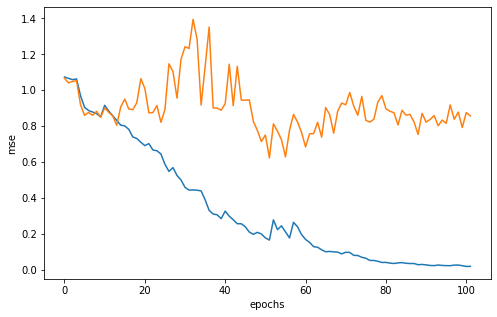

In [11]:
import matplotlib.pyplot as plt
# plot train processing
fig1=plt.Figure()
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('mse')


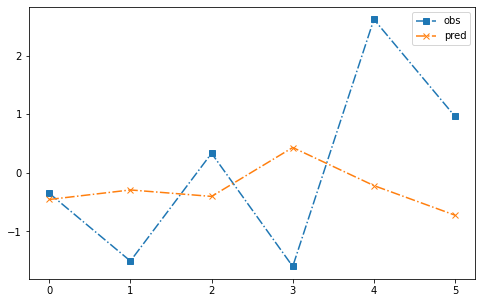

In [12]:

# plot compare testing
fig2=plt.Figure()
plt.figure(figsize=(8, 5))
plt.plot(ytest[-1,:],'-.s')
plt.plot(yhat[-1,:],'-.x')
plt.legend(["obs","pred"])


        obs      pred
0 -0.348955 -0.454490
1 -1.503861 -0.291732
2  0.333306 -0.402103
3 -1.595906  0.431717
4  2.616200 -0.217646
5  0.960593 -0.722274


<Figure size 576x360 with 0 Axes>

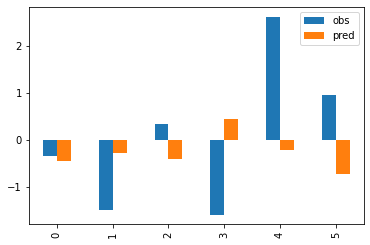

In [13]:

fig3=plt.Figure()
plt.figure(figsize=(8, 5))
df_results=pd.DataFrame({'obs':ytest[-1,:],'pred':yhat[-1,:]})
df_results.plot(kind='bar')
print(df_results)



In [14]:
# from scipy.stats import pearsonr
# fig3=plt.Figure(figsize=(6, 6))
# # plt.rcParams['figure.figsize'] = 6, 6

# sns.set_style("whitegrid")
# #calculate correlation coefficient
# corr = pearsonr(np.array(ytest[-1,:].flatten()), np.array(yhat[-1,:].flatten()))
# # corr = [np.round(c, 2) for c in corr]
# #add the coefficient to your graph
# text = 'r=%4.2f,\n p=%4.3e' % (corr[0], corr[1])
# plt.scatter(np.array(ytest[-1,:].flatten()), np.array(yhat[-1,:].flatten()))
# sns.regplot(np.array(ytest[-1,:].flatten()),np.array(yhat[-1,:].flatten()),
#         scatter_kws={"color": "black"}, line_kws={"color": "red"})
# plt.title("Compare prediction and observation")
# plt.text(0,np.array(yhat[-1,:].flatten()).min()+0.1, text, fontsize=13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.tight_layout>

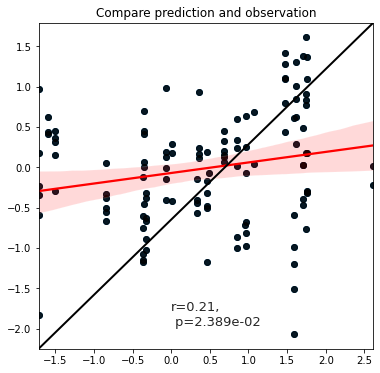

In [15]:
#plot scater plot prediction
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from scipy.stats import pearsonr
import numpy as np

# fig3,ax=plt.subplot()
plt.rcParams['figure.figsize'] = 6, 6
fig, ax = plt.subplots()
sns.set_style("whitegrid")
#calculate correlation coefficient
corr = pearsonr(np.array(ytest[:,:].flatten()), np.array(yhat[:,:].flatten()))
# corr = [np.round(c, 2) for c in corr]
#add the coefficient to your graph
text = 'r=%4.2f,\n p=%4.3e' % (corr[0], corr[1])
plt.scatter(np.array(ytest[:,:].flatten()), np.array(yhat[:,:].flatten()))
sns.regplot(np.array(ytest[:,:].flatten()),np.array(yhat[:,:].flatten()),
        scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Compare prediction and observation")
plt.text(0,np.array(yhat[:,:].flatten()).min()+0.1, text, fontsize=13)

line = mlines.Line2D([0, 1], [0, 1],linewidth=2, color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
# plt.show()


plt.tight_layout

# Vẽ nhiều chuỗi dự báo ghép lại

Bài toán dùng 12 giá trị quá khứ dự báo 3 giá trị tương lai

dataset_test.shape
(36, 11)
36 hàng của 11 cột

Xtest.shape
(23, 12, 10) # 11 bỏ cột cuối cuối thành y

ytest.shape
(23, 3)

có 23 lần dự báo ra 3 tháng

giữa các giá trị dự báo hoặc cách 3 tháng theo ví dụ tensorflow

muốn nối các kết quả với nhau thì shift 3 tháng

Phải viết hàm ngược lại của split sequence mới quay lại được giá trị ban đầu. Nó phụ thuộc vào  n_steps_in, n_steps_out


In [16]:
# # ytest_org=ytest.reshape()
# iii=n_steps_out-1
# n_steps_in
# n_steps_out
# plt.plot(np.arange(0+n_steps_in-1+iii,ytest.shape[0]+dataset_test.shape[1]+iii),ytest[:,iii])
# plt.plot(np.arange(0+n_steps_in-1+iii,yhat.shape[0]+dataset_test.shape[1]+iii),yhat[:,iii])
# # plt.plot(np.arange(0+n_steps_in-1+iii,dataset_test.shape[0]),dataset_test[0+n_steps_in-1+iii:,iii],'-.x')

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
dataset_test.shape

n_steps_in

n_steps_out
Xtest.shape
ytest.shape

(20, 6)

Text(0.5, 1.0, '6 months prediction')

Text(0.5, 0, 'months')

Text(0, 0.5, 'NDI')

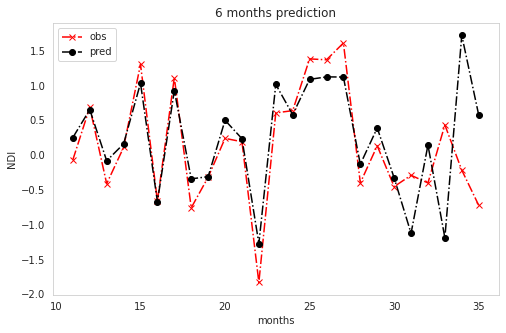

In [39]:
# ytest org
y_org=list(ytest[:,0])
for i in range(1,ytest.shape[1]):
  y_org.append(ytest[:,i][-1])

# yhat org
yhat_org=list(yhat[:,0])
for i in range(1,yhat.shape[1]):
  yhat_org.append(yhat[:,i][-1])

fig4=plt.Figure()
plt.rcParams['figure.figsize'] = 8, 5


plt.plot(np.arange(0+n_steps_in-1,len(yhat_org)+n_steps_in-1),yhat_org,'-.x',color='red') # prediction
# plt.plot(np.arange(0+n_steps_in-1,len(y_org)+n_steps_in-1),y_org,'-.x') # obs scaled
plt.plot(np.arange(0+n_steps_in-1,len(dataset_test[:,-1])),dataset_test[n_steps_in-1:,-1],'-.o',color='black') # obs 
plt.legend(['obs','pred'])
plt.title(str(n_steps_out)+' months prediction')
plt.xlabel('months')
plt.ylabel('NDI')
plt.grid(None)
plt.savefig(out_dir_all[0]+'/'+str(n_steps_in)+'_'+str(n_steps_out)+'pred.png')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Compare prediction and observation')

Text(0, -1.6166290104502845, 'r=0.67,\n p=2.564e-04')

Text(0.5, 1.0, 'Correlation of 6 months prediction')

Text(0.5, 0, 'obs')

Text(0, 0.5, 'pred')

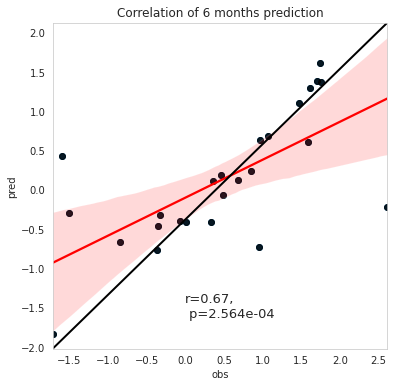

In [40]:
# fig3,ax=plt.subplot()
plt.rcParams['figure.figsize'] = 6, 6
fig, ax = plt.subplots()
sns.set_style("whitegrid")
#calculate correlation coefficient
corr = pearsonr(np.array(y_org), np.array(yhat_org))
# corr = [np.round(c, 2) for c in corr]
#add the coefficient to your graph
text = 'r=%4.2f,\n p=%4.3e' % (corr[0], corr[1])
plt.scatter(np.array(y_org), np.array(yhat_org))
sns.regplot(np.array(y_org), np.array(yhat_org),
        scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Compare prediction and observation")
plt.text(0,np.array(y_org).min()+0.1, text, fontsize=13)

line = mlines.Line2D([0, 1], [0, 1],linewidth=2, color='black')
transform = ax.transAxes
line.set_transform(transform)
plt.title('Correlation of '+str(n_steps_out)+' months prediction')
ax.add_line(line)
plt.xlabel('obs')
plt.ylabel('pred')
plt.grid(None)
plt.savefig(out_dir_all[0]+'/'+str(n_steps_in)+'_'+str(n_steps_out)+'cor.png')
# plt.show()